In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("/content/sample_data/raw_analyst_ratings.csv")
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [24]:
def analyze_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string in case of missing values
    return analysis.sentiment.polarity

# Apply sentiment analysis to the headline column
df['sentiment_score'] = df['headline'].apply(analyze_sentiment)

# Classify sentiment based on the score
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)

# Preview the DataFrame with sentiment columns
print(df[['headline', 'sentiment_score', 'sentiment_label']])


                                                  headline  sentiment_score  \
0                  Stocks That Hit 52-Week Highs On Friday             0.00   
1               Stocks That Hit 52-Week Highs On Wednesday             0.00   
2                            71 Biggest Movers From Friday             0.00   
3             46 Stocks Moving In Friday's Mid-Day Session             0.00   
4        B of A Securities Maintains Neutral on Agilent...             0.00   
...                                                    ...              ...   
1407323             Top Narrow Based Indexes For August 29             0.15   
1407324  Recap: Wednesday's Top Percentage Gainers and ...             0.15   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...             0.00   
1407326  Oppenheimer Initiates China Zenix At Outperfor...             0.00   
1407327  China Zenix Auto International Opens For Tradi...             0.00   

        sentiment_label  
0               neutral  

In [17]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))

# Tokenize and filter stopwords
def tokenize_and_filter(text):
    tokens = word_tokenize(str(text).lower())  # Convert to string to handle missing values
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Apply tokenization
df['tokens'] = df['headline'].apply(tokenize_and_filter)

# Combine all tokens and count frequencies
all_tokens = [token for tokens in df['tokens'] for token in tokens]
keyword_counts = Counter(all_tokens)

# Display the top 10 keywords
print("Top Keywords:", keyword_counts.most_common(10))


Top Keywords: [('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528)]


In [19]:
from nltk import bigrams

# Extract bigrams
def extract_bigrams(tokens):
    return list(bigrams(tokens))

df['bigrams'] = df['tokens'].apply(extract_bigrams)

# Flatten all bigrams and count frequencies
all_bigrams = [bigram for bigrams_list in df['bigrams'] for bigram in bigrams_list]
bigram_counts = Counter(all_bigrams)

# Display the top 10 bigrams
print("Top Bigrams:", bigram_counts.most_common(10))


Top Bigrams: [(('vs', 'est'), 93818), (('eps', 'vs'), 58410), (('price', 'target'), 47264), (('benzinga', 'top'), 44259), (('stocks', 'moving'), 40038), (('market', 'update'), 33059), (('earnings', 'scheduled'), 32054), (('initiates', 'coverage'), 28981), (('raises', 'pt'), 27264), (('shares', 'several'), 24077)]


In [20]:
# Save the updated DataFrame
output_file_path = "/content/sample_data/exteracted_file.csv"
df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


Results saved to /content/sample_data/exteracted_file.csv


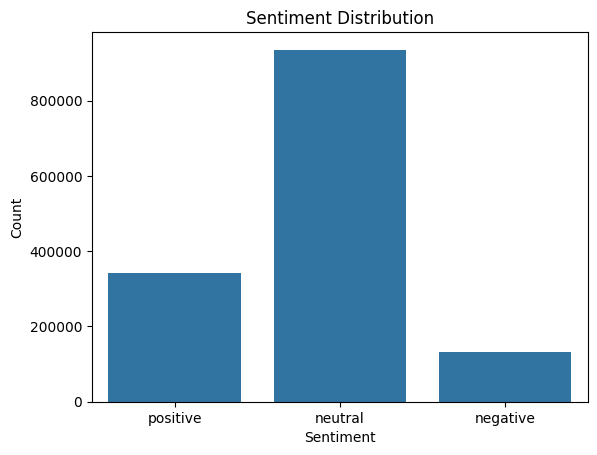

In [22]:
# Plot sentiment distribution
sns.countplot(x='sentiment_label', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


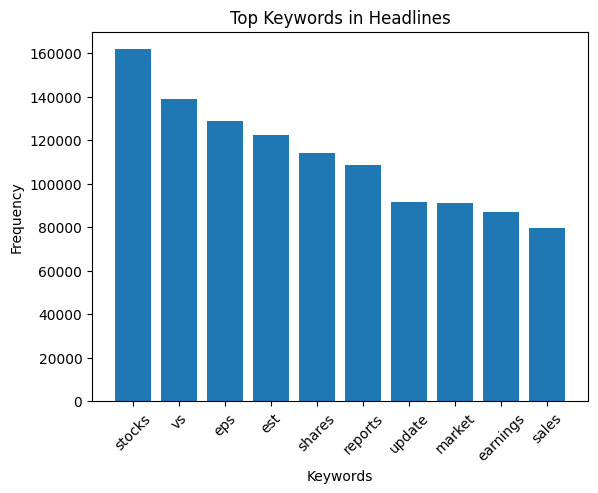

In [23]:
# Plot top keywords
top_keywords = keyword_counts.most_common(10)
keywords, counts = zip(*top_keywords)

plt.bar(keywords, counts)
plt.title('Top Keywords in Headlines')
plt.xticks(rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()
